In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states
import networkx as nx
from model import create_model
import tensorflow as tf
from mutate import mutate_dag
from crossover import crossover
from Individual import Individual
from Generation import Generation
import visualkeras

2023-12-11 11:27:17.409928: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 11:27:17.415617: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 11:27:17.492980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 11:27:17.493033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 11:27:17.495024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

input


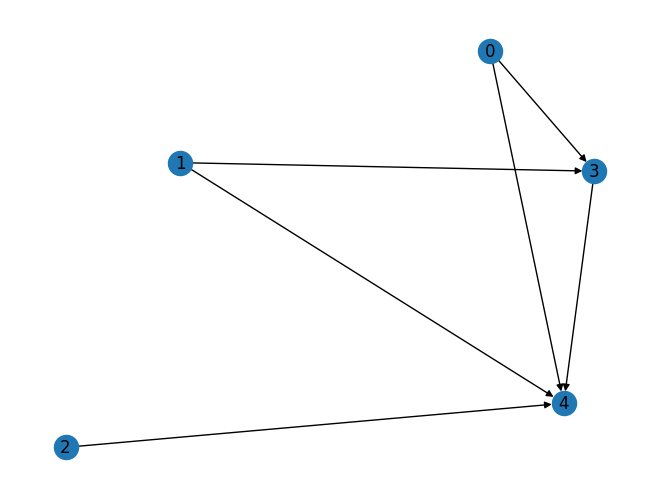

In [2]:
g1 = create_random_graph(5,0.8)
g1 = assign_states(g1,(1,3,1))
print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

OutEdgeDataView([(0, 3, {'_igraph_index': 0}), (0, 4, {'_igraph_index': 2}), (3, 4, {'_igraph_index': 5})])

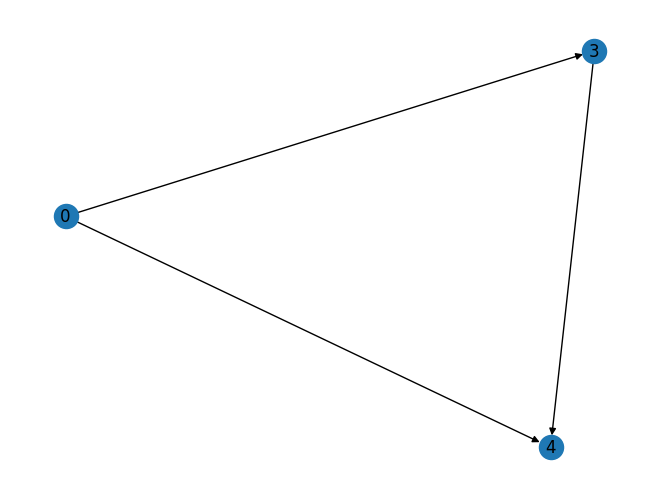

In [3]:
g1 = to_useful(g1,(1,3,1))
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [4]:
g1.nodes

NodeView((0, 3, 4))

In [5]:
import numpy as np
import random
import tensorflow_datasets as tfds

#import minst dataset and split to test trin
mnist_dataset, mnist_info = tfds.load(name='crema_d', with_info=True, as_supervised=True)

def scale(waveform, label):
    waveform = tf.cast(waveform,tf.float64)
    spectrogram = tf.signal.stft(
    waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[..., tf.newaxis]
    spectrogram = tf.image.resize(spectrogram,(315,315))
    label = tf.one_hot(label, 6)
    return spectrogram, label

train_data = mnist_dataset['train'].map(scale)
test_data = mnist_dataset['test'].map(scale)
train_image , train_label = next(iter(train_data.batch(1)))

train_ds = train_data.shuffle(10).cache().prefetch(10).batch(64)
test_ds = test_data.cache().prefetch(10).batch(64)

print(train_image.shape)
print(train_label.shape)

/home/balasai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1, 315, 315, 1)
(1, 6)


In [6]:
mnist_dataset , mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
train_data = mnist_dataset['train']
test_data = mnist_dataset['test']
def scale(image, label):
    image = tf.cast(image,tf.float64)
    image = image/255
    label = tf.one_hot(label, 10)
    return image, label
train_data = train_data.map(scale)
test_data = test_data.map(scale)
train_ds = train_data.cache().batch(64).prefetch(10)
test_ds = test_data.cache().batch(64).prefetch(10)
train_image , train_label = next(iter(train_data.batch(1)))
print(train_image.shape)
print(train_label)

(1, 28, 28, 1)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


2023-12-11 11:27:24.083165: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [7]:
model = create_model(g1,(28,28,1),10)

In [8]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),
                                                                                                               #tf.keras.metrics.AUC(from_logits=True),
                                                                                                               #tf.keras.metrics.Precision(),
                                                                                                               #tf.keras.metrics.Recall()
                                                                                                               ])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 3.0dropout (Dropout)        (None, 28, 28, 1)            0         ['input_layer[0][0]']         
                                                                                                  
 4_concatenate (ZeroPadConc  (None, 28, 28, 2)            0         ['input_layer[0][0]',         
 atLayer)                                                            '3.0dropout[0][0]']          
                                                                                                  
 4_dropout (Dropout)         (None, 28, 28, 2)            0         ['4_concatenate[0][0]']   

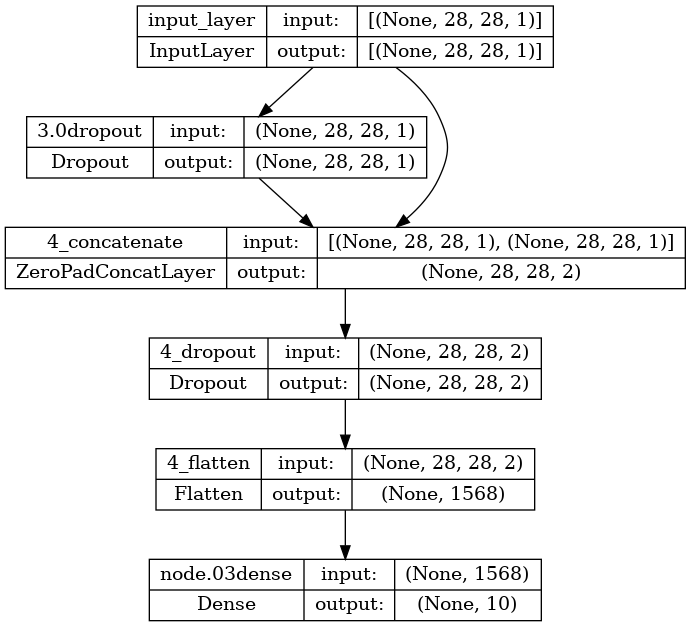

In [10]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

mutated


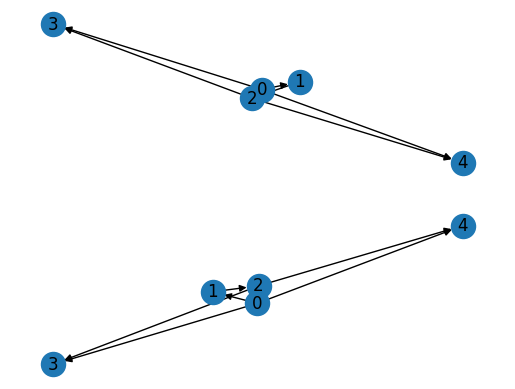

In [11]:
g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
fig , ax = plt.subplots(2,1)
g3 = mutate_dag(g1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g3, with_labels=True, ax=ax[1])
plt.draw()


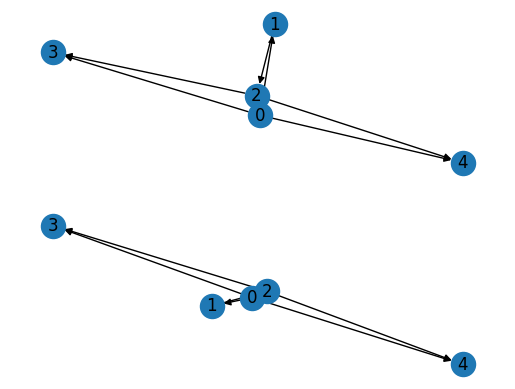

In [12]:
g4 = crossover(g1,g3)
fig , ax = plt.subplots(2,1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g4, with_labels=True, ax=ax[1])
plt.draw()

In [13]:
in1 = Individual((28,28,1),(10),(1,3,1),5,0.9)
tf.keras.utils.plot_model(in1.model, to_file='model.png', show_shapes=True)
model = in1.model
visualkeras.layered_view(model, to_file='output.png').show() # view model structure in jupyter (suggested)

(None, 28, 28, 1) 13
(None, 28, 28, 1) 4
(None, 28, 28, 3) 10


In [14]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
callback = tf.keras.callbacks.ReduceLROnPlateau()
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.Accuracy(),
                                                                                                               #tf.keras.metrics.AUC(from_logits=True),
                                                                                                               #tf.keras.metrics.Precision(),
                                                                                                               #tf.keras.metrics.Recall()
                                                                                                               ])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1.0maxpooling2d (MaxPoolin  (None, 3, 3, 1)              0         ['input_layer[0][0]']         
 gCustom)                                                                                         
                                                                                                  
 2.0maxpooling2d (MaxPoolin  (None, 7, 7, 1)              0         ['input_layer[0][0]']         
 gCustom)                                                                                         
                                                                                            

                                                                                                  
 node.0123dense (Dense)      (None, 10)                   47050     ['4_flatten[0][0]']           
                                                                                                  
Total params: 47050 (183.79 KB)
Trainable params: 47050 (183.79 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [17]:
model.fit(train_ds,validation_data=test_ds, epochs=10, callbacks=[callback])

Epoch 1/10


938/938 [==============================] - 10s 11ms/step - loss: 0.6612 - accuracy: 1.3333e-05 - val_loss: 0.3616 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6575 - accuracy: 1.5000e-05 - val_loss: 0.3638 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6597 - accuracy: 2.1667e-05 - val_loss: 0.3620 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6610 - accuracy: 1.5000e-05 - val_loss: 0.3638 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6541 - accuracy: 1.5000e-05 - val_loss: 0.3599 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6546 - accuracy: 1.8333e-05 - val_loss: 0.3651 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/10
938/938 [=

In [19]:
ga = Generation(input_size=(28,28,1),output_size=(10),states=(1,8,1),nodes=10,edges=0.6,population=7,limit=18,train_ds=train_ds,test_ds=test_ds)
ga.run(10,0.8,0.8)

(None, 28, 28, 1) 7
(None, 19, 19, 6) 9
(None, 28, 28, 1) 13
(None, 28, 28, 1) 7
(None, 28, 28, 20) 13
(None, 28, 28, 1) 1
Generation: 0
individual score:  2.0759387053996883
(32, 28, 28, 1) 7
(32, 19, 19, 6) 9
(32, 28, 28, 1) 7
(32, 19, 19, 6) 9
individual score:  2.6729009483931447
individual score:  2.075511626240443
(32, 28, 28, 1) 13
(32, 28, 28, 1) 7
(32, 28, 28, 1) 13
(32, 28, 28, 1) 7
individual score:  2.674169650907098
(32, 28, 28, 20) 13
(32, 28, 28, 20) 13
individual score:  2.6767960724116144
individual score:  2.6205074076544195
(32, 28, 28, 1) 1
(32, 28, 28, 1) 1
individual score:  2.644485613770404
(None, 28, 28, 1) 7
(None, 19, 19, 6) 9
(None, 28, 28, 1) 1
(None, 28, 28, 36) 13
(None, 28, 28, 1) 7
(None, 28, 28, 8) 9
(None, 28, 28, 1) 7
(None, 28, 28, 8) 9
(None, 28, 28, 1) 7
(None, 28, 28, 2) 9
(None, 28, 28, 1) 7
(None, 28, 28, 18) 9
(None, 28, 28, 1) 7
(None, 28, 28, 18) 9
(None, 28, 28, 1) 7
(None, 28, 28, 18) 9
Best score: 2.6767960724116144
Epoch 1/5
(None, 28, 2

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/generation_0/2.6767960724116144.png'